In [ ]:
!pip install datasets

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from torch.utils.data import DataLoader
import torch
import torch.nn.functional as F
from datasets import load_dataset

model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
model.resize_token_embeddings(len(tokenizer))

dataset = load_dataset("squad")

def format_sample(example):
    answer = example["answers"]["text"][0] if example["answers"]["text"] else "N/A"
    return {
        "text": f"Q: {example['question']}\nContext: {example['context']}\nA: {answer}"
    }

formatted_dataset = dataset.map(format_sample)

def tokenize(example):
    encoding = tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",
        max_length=128,
    )
    encoding["labels"] = encoding["input_ids"][:]
    return encoding


tokenized = formatted_dataset.map(tokenize, batched=True)

small_train = tokenized["train"].select(range(2000))

small_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"], output_all_columns=True)

train_loader = DataLoader(small_train, batch_size=2, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

plain_text/validation-00000-of-00001.par(…):   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Map:   0%|          | 0/87599 [00:00<?, ? examples/s]

Map:   0%|          | 0/10570 [00:00<?, ? examples/s]

Map:   0%|          | 0/87599 [00:00<?, ? examples/s]

Map:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [ ]:
tp = list(small_train["context"])

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('all-MiniLM-L6-v2')




modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings = embedder.encode(tp)
print(embeddings.shape)


(2000, 384)


In [ ]:
small_train

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers', 'text', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 2000
})

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from torch.utils.data import DataLoader
import torch
import torch.nn.functional as F
from datasets import load_dataset

model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
model.resize_token_embeddings(len(tokenizer))

dataset = load_dataset("squad")

def format_sample(example):
    answer = example["answers"]["text"][0] if example["answers"]["text"] else "N/A"
    return {
        "text": f"Q: {example['question']}\nContext: {example['context']}\nA: {answer}"
    }

formatted_dataset = dataset.map(format_sample)

def tokenize(example):
    encoding = tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",
        max_length=128,
    )
    encoding["labels"] = encoding["input_ids"][:]
    return encoding


tokenized = formatted_dataset.map(tokenize, batched=True)

small_train = tokenized["train"].select(range(2000))

small_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"], output_all_columns=True)

train_loader = DataLoader(small_train, batch_size=1, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)




Map:   0%|          | 0/87599 [00:00<?, ? examples/s]

Map:   0%|          | 0/10570 [00:00<?, ? examples/s]

Map:   0%|          | 0/87599 [00:00<?, ? examples/s]

Map:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [ ]:
losses = []
positions = []

In [ ]:
#device = torch.device("cpu")


In [ ]:
model = AutoModelForCausalLM.from_pretrained("distilgpt2")
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token
model.resize_token_embeddings(len(tokenizer))
model.gradient_checkpointing_enable()
model.to(device)

train_loader = DataLoader(small_train, batch_size=1, shuffle=True)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

from torch.cuda.amp import autocast, GradScaler
scaler = GradScaler()

losses, positions = [], []

for step, batch in enumerate(train_loader):
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)

    optimizer.zero_grad()

    with autocast():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()

    losses.append(loss.item())
    positions.append(embedder.encode(small_train["context"][step], device="cpu"))

    print(f"Step {step}, Loss: {loss.item():.4f}")


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/tmp/ipython-input-74020088.py:12: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipython-input-74020088.py:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Step 0, Loss: 3.8663
Step 1, Loss: 4.1434
Step 2, Loss: 4.1091
Step 3, Loss: 3.1351
Step 4, Loss: 4.5622
Step 5, Loss: 4.2511
Step 6, Loss: 3.6836
Step 7, Loss: 3.5465
Step 8, Loss: 2.9798
Step 9, Loss: 4.1661
Step 10, Loss: 3.7001
Step 11, Loss: 3.0928
Step 12, Loss: 3.3686
Step 13, Loss: 4.3196
Step 14, Loss: 5.1946
Step 15, Loss: 3.9295
Step 16, Loss: 3.9913
Step 17, Loss: 3.6280
Step 18, Loss: 3.3568
Step 19, Loss: 3.6112
Step 20, Loss: 3.3128
Step 21, Loss: 7.9917
Step 22, Loss: 4.2233
Step 23, Loss: 6.0793
Step 24, Loss: 4.1873
Step 25, Loss: 4.0886
Step 26, Loss: 3.0720
Step 27, Loss: 3.1980
Step 28, Loss: 3.4649
Step 29, Loss: 3.6904
Step 30, Loss: 2.9086
Step 31, Loss: 3.9541
Step 32, Loss: 3.8504
Step 33, Loss: 4.0166
Step 34, Loss: 3.6565
Step 35, Loss: 3.9012
Step 36, Loss: 3.8157
Step 37, Loss: 4.8137
Step 38, Loss: 4.1013
Step 39, Loss: 3.7562
Step 40, Loss: 3.8665
Step 41, Loss: 3.5118
Step 42, Loss: 3.6604
Step 43, Loss: 3.7896
Step 44, Loss: 3.5106
Step 45, Loss: 3.025

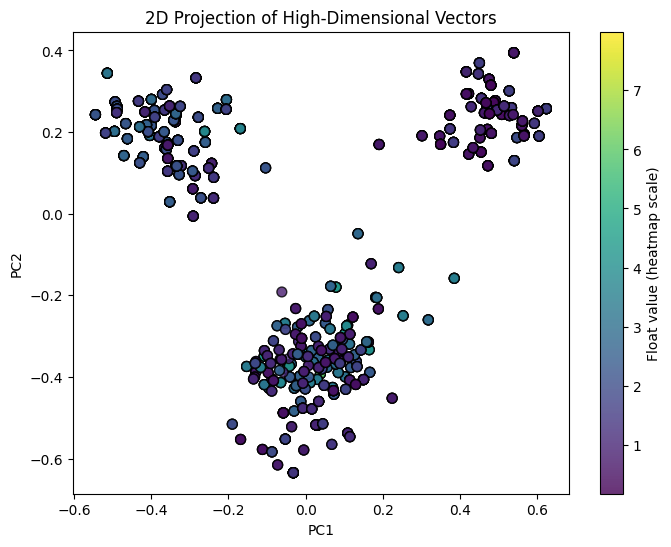

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example data (replace with your own)
# Suppose you have 100 vectors, each 50-dimensional
vectors = np.array(positions)
float_values = np.array(losses)  # values in [0,1]

# ---- Step 1: Project to 2D ----
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# ---- Step 2: Scatter plot with heatmap coloring ----
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    vectors_2d[:, 0], vectors_2d[:, 1],
    c=float_values,              # color by float values
    cmap="viridis",              # heatmap style colormap
    s=50,                        # point size
    alpha=0.8,                   # transparency
    edgecolors="k"
)

plt.colorbar(scatter, label="Float value (heatmap scale)")
plt.title("2D Projection of High-Dimensional Vectors")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


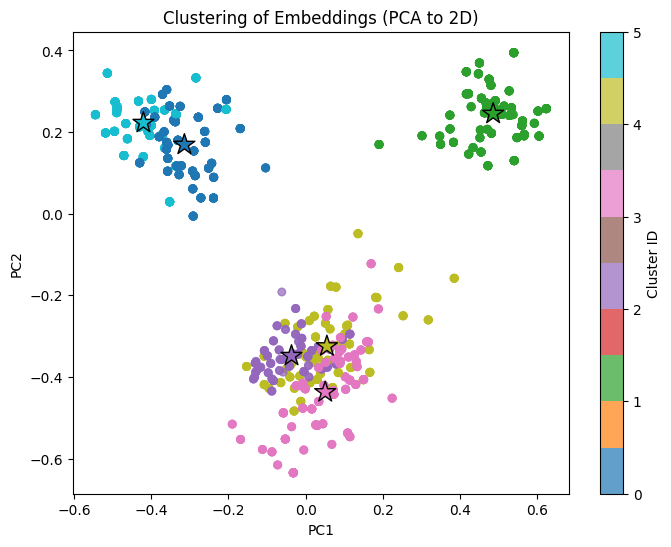

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# ---- Prepare data ----
X = np.vstack(positions)   # (n_samples, embedding_dim)

# ---- Clustering ----
n_clusters = 6  # choose as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# ---- Cluster means (in embedding space) ----
cluster_means = []
for cluster_id in range(n_clusters):
    cluster_points = X[labels == cluster_id]
    cluster_mean = cluster_points.mean(axis=0)
    cluster_means.append(cluster_mean)
cluster_means = np.vstack(cluster_means)

# ---- Project to 2D for visualization ----
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
means_2d = pca.transform(cluster_means)

# ---- Plot ----
plt.figure(figsize=(8, 6))

# plot points
scatter = plt.scatter(
    X_2d[:, 0], X_2d[:, 1],
    c=labels, cmap="tab10", s=30, alpha=0.7
)

# plot cluster centers
plt.scatter(
    means_2d[:, 0], means_2d[:, 1],
    c=range(n_clusters),
    cmap="tab10",
    marker="*", s=250, edgecolors="k"
)

plt.title("Clustering of Embeddings (PCA to 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()


In [ ]:
cluster_means.shape

(6, 384)

In [ ]:
import numpy as np

In [ ]:
center = np.mean(embeddings,axis=0)

In [ ]:
np.max(np.abs(np.linalg.norm(embeddings - np.array(center),axis=1)))

np.float32(1.0767293)

In [ ]:
embeddings - center

array([[ 0.03778994,  0.16363981,  0.00110093, ...,  0.05578354,
         0.01580423,  0.00443124],
       [ 0.03778994,  0.16363981,  0.00110093, ...,  0.05578354,
         0.01580423,  0.00443124],
       [ 0.03778994,  0.16363981,  0.00110093, ...,  0.05578354,
         0.01580423,  0.00443124],
       ...,
       [ 0.03235526,  0.01681057,  0.02856543, ...,  0.1302164 ,
        -0.07012999,  0.00710194],
       [ 0.03235526,  0.01681057,  0.02856543, ...,  0.1302164 ,
        -0.07012999,  0.00710194],
       [ 0.03235526,  0.01681057,  0.02856543, ...,  0.1302164 ,
        -0.07012999,  0.00710194]], dtype=float32)

In [ ]:
goalr = np.sum(np.abs(np.linalg.norm(embeddings - np.array(center),axis=1)))

In [ ]:
goalr

np.float32(1893.3303)

In [ ]:
expected_lr = 5e-5*2000

In [ ]:
#batch["context"]

In [ ]:
#np.abs(np.linalg.norm(np.array(embedder.encode(batch["context"][1])) - np.array(center)))


In [ ]:
"""import numpy as np
from datasets import Dataset

# 1. Convert small_train back into HF Dataset with "context"
# formatted_dataset["train"] already has "context"
subset = formatted_dataset["train"].select(range(2000))

# 2. Precompute embeddings for all contexts
context_embeddings = [embedder.encode(ctx, device="cpu") for ctx in subset["context"]]

# 3. Compute min distance to cluster means for each context
distances = []
for emb in context_embeddings:
    temp = [np.linalg.norm(np.array(emb) - np.array(cluster_means[i])) for i in range(len(cluster_means))]
    distances.append(min(temp))

# 4. Add distances as a new column
subset = subset.add_column("sorting_column", distances)

# 5. Sort dataset
sorted_dataset = subset.sort("sorting_column")

# 6. Split into two halves
train_dataset1 = sorted_dataset.select(range(1000))
train_dataset2 = sorted_dataset.select(range(1000, 2000))

# 7. Convert to torch-format + dataloaders
train_dataset1.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
train_dataset2.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

train_loader1 = DataLoader(train_dataset1, batch_size=1, shuffle=False)
train_loader2 = DataLoader(train_dataset2, batch_size=1, shuffle=False)
"""

'import numpy as np\nfrom datasets import Dataset\n\n# 1. Convert small_train back into HF Dataset with "context"\n# formatted_dataset["train"] already has "context"\nsubset = formatted_dataset["train"].select(range(2000))\n\n# 2. Precompute embeddings for all contexts\ncontext_embeddings = [embedder.encode(ctx, device="cpu") for ctx in subset["context"]]\n\n# 3. Compute min distance to cluster means for each context\ndistances = []\nfor emb in context_embeddings:\n    temp = [np.linalg.norm(np.array(emb) - np.array(cluster_means[i])) for i in range(len(cluster_means))]\n    distances.append(min(temp))\n\n# 4. Add distances as a new column\nsubset = subset.add_column("sorting_column", distances)\n\n# 5. Sort dataset\nsorted_dataset = subset.sort("sorting_column")\n\n# 6. Split into two halves\ntrain_dataset1 = sorted_dataset.select(range(1000))\ntrain_dataset2 = sorted_dataset.select(range(1000, 2000))\n\n# 7. Convert to torch-format + dataloaders\ntrain_dataset1.set_format(type="torch

In [ ]:
range_coef = 0.5

In [ ]:
import numpy as np
from datasets import Dataset

# 1. Convert small_train back into HF Dataset with "context"
# formatted_dataset["train"] already has "context"
subset = formatted_dataset["train"].select(range(2000))

# 2. Precompute embeddings for all contexts
context_embeddings = [embedder.encode(ctx, device="cpu") for ctx in subset["context"]]

# 3. Compute min distance to cluster means for each context
distances = []
for emb in context_embeddings:
    temp = [np.linalg.norm(np.array(emb) - np.array(cluster_means[i])) for i in range(len(cluster_means))]
    distances.append(min(temp))

# 4. Add distances as a new column
subset = subset.add_column("sorting_column", distances)

In [ ]:
def balanced_half(values):
    target = len(values) // 2

    # Always keep min and max
    chosen = [values[0], values[-1]]
    remaining = set(values[1:-1])
    res = []
    while len(chosen) < target and remaining:
        # Pick the point farthest from its nearest chosen neighbor
        best = max(remaining, key=lambda x: min(abs(x - c) for c in chosen))
        res.append(values.index(best))
        chosen.append(best)
        remaining.remove(best)

    return sorted(res)

# Example
vals = [1, 2, 3,3,3,3,3, 10, 11, 20, 21, 22]
print(balanced_half(vals))


[1, 2, 8, 9]


In [ ]:
needed_indexes = balanced_half(sorted_dataset["sorting_column"])

NameError: name 'sorted_dataset' is not defined

In [ ]:
needed_indexes

In [ ]:


# 5. Sort dataset


# 6. Split into two halves
train_dataset1 = sorted_dataset.select(range(1000))
train_dataset2 = sorted_dataset.select(range(1000, 2000))


train_dataset_coverage = sorted_dataset.select(needed_indexes)

train_dataset1 = train_dataset1.map(tokenize, batched=True)

train_dataset2  = train_dataset1.map(tokenize, batched=True)

train_dataset_coverage = train_dataset_coverage.map(tokenize, batched=True)


# 7. Convert to torch-format + dataloaders
train_dataset1.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
train_dataset2.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
train_dataset_coverage.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])


train_loader1 = DataLoader(train_dataset1, batch_size=1, shuffle=False)
train_loader2 = DataLoader(train_dataset2, batch_size=1, shuffle=False)

train_dataset_coverage = DataLoader(train_dataset_coverage, batch_size=1, shuffle=False)


In [ ]:
sorted_dataset["sorting_column"]

In [ ]:
distances = []
for i in range(2000):

  distances.append(min([np.linalg.norm(context_embeddings[i] - cm) for cm in cluster_means]))


In [ ]:
balanced_half(sorted(distances))

In [ ]:
goalr = sum(distances)

In [ ]:
goalr

In [ ]:
aim = np.mean(distances)

In [ ]:

# Training loop
for epoch in range(1):
    print(f"Epoch {epoch + 1}")
    for step, batch in enumerate(train_loader1):
        # Get precomputed embedding for this sample
       # emb = context_embeddings[step]

        # Distance to cluster means
        #distances = [np.linalg.norm(emb - cm) for cm in cluster_means]
        #av = min(distances)
       #av = distances[step]
        # Adjust LR (with clamp)
        #balanced = 5e-5 - (range_coef*(av))*(5e-5)


       # balanced = range_coef*(1-(av/aim)) + 5e-5

        #new_lr = balanced*((expected_lr)/(goalr))
       # new_lr = max(1e-6, min(1e-4, balanced))
        #print(balanced,range_coef)
        #for param_group in optimizer.param_groups:
        #    param_group['lr'] = new_lr

        # Forward/backward
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        #if step % 10 == 0:
        #    print(f"Step {step}, Loss: {loss.item():.4f}, LR: {new_lr:.6f}")



In [ ]:
from torch.utils.data import DataLoader

small_eval = tokenized["validation"].select(range(200))

small_eval.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

eval_loader = DataLoader(small_eval, batch_size=2)

model.eval()

total_loss = 0.0
num_batches = 0

with torch.no_grad():
    for batch in eval_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        num_batches += 1

avg_loss = total_loss / num_batches
print(f"Average evaluation loss: {avg_loss:.4f}")

perplexity = torch.exp(torch.tensor(avg_loss))
print(f"Perplexity: {perplexity:.4f}")


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from torch.utils.data import DataLoader
import torch
import torch.nn.functional as F
from datasets import load_dataset

model2 = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
model2.resize_token_embeddings(len(tokenizer))

dataset = load_dataset("squad")

def format_sample(example):
    answer = example["answers"]["text"][0] if example["answers"]["text"] else "N/A"
    return {
        "text": f"Q: {example['question']}\nContext: {example['context']}\nA: {answer}"
    }

formatted_dataset = dataset.map(format_sample)

def tokenize(example):
    encoding = tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",
        max_length=128,
    )
    encoding["labels"] = encoding["input_ids"][:]
    return encoding


tokenized = formatted_dataset.map(tokenize, batched=True)

small_train = tokenized["train"].select(range(2000))

small_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"], output_all_columns=True)

train_loader = DataLoader(small_train, batch_size=1, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

optimizer = torch.optim.AdamW(model2.parameters(), lr=5e-5)

model2.train()
for epoch in range(1):
    print(f"Epoch {epoch + 1}")
    for step, batch in enumerate(train_loader2):

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        #if step % 10 == 0:
        #    print(f"Step {step}, Loss: {loss.item():.4f}")


In [ ]:
from torch.utils.data import DataLoader

small_eval = tokenized["validation"].select(range(200))

small_eval.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

eval_loader = DataLoader(small_eval, batch_size=2)

model2.eval()

total_loss = 0.0
num_batches = 0

with torch.no_grad():
    for batch in eval_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        num_batches += 1

avg_loss = total_loss / num_batches
print(f"Average evaluation loss: {avg_loss:.4f}")

perplexity = torch.exp(torch.tensor(avg_loss))
print(f"Perplexity: {perplexity:.4f}")


EQUAL COVERAGES

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from torch.utils.data import DataLoader
import torch
import torch.nn.functional as F
from datasets import load_dataset

model3 = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
model3.resize_token_embeddings(len(tokenizer))

dataset = load_dataset("squad")

def format_sample(example):
    answer = example["answers"]["text"][0] if example["answers"]["text"] else "N/A"
    return {
        "text": f"Q: {example['question']}\nContext: {example['context']}\nA: {answer}"
    }

formatted_dataset = dataset.map(format_sample)

def tokenize(example):
    encoding = tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",
        max_length=128,
    )
    encoding["labels"] = encoding["input_ids"][:]
    return encoding


tokenized = formatted_dataset.map(tokenize, batched=True)

small_train = tokenized["train"].select(range(2000))

small_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"], output_all_columns=True)

train_loader = DataLoader(small_train, batch_size=1, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model3.to(device)

optimizer = torch.optim.AdamW(model3.parameters(), lr=5e-5)

model3.train()
for epoch in range(1):
    print(f"Epoch {epoch + 1}")
    for step, batch in enumerate(train_dataset_coverage):

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model3(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        #if step % 10 == 0:
        #    print(f"Step {step}, Loss: {loss.item():.4f}")


In [ ]:
from torch.utils.data import DataLoader

small_eval = tokenized["validation"].select(range(200))

small_eval.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

eval_loader = DataLoader(small_eval, batch_size=2)

model3.eval()

total_loss = 0.0
num_batches = 0

with torch.no_grad():
    for batch in eval_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model3(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        num_batches += 1

avg_loss = total_loss / num_batches
print(f"Average evaluation loss: {avg_loss:.4f}")

perplexity = torch.exp(torch.tensor(avg_loss))
print(f"Perplexity: {perplexity:.4f}")
